In [5]:
# https://datascienceplus.com/selecting-categorical-features-in-customer-attrition-prediction-using-python/
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince # for multiple correspondence analysis
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [8]:
churn1 = pd.read_csv('Customer_churn.csv')

senior = {0 : 'No',
        1 : 'Yes'}

churn1['SeniorCitizen'].replace(senior, inplace=True)

def tenure(data):
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

churn1['tenure'] = churn1['tenure'].apply(tenure)

def charges(data):
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

churn1['MonthlyCharges'] = churn1['MonthlyCharges'].apply(charges)
recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic check' : 'check',
            'Mailed check' : 'check',
            'Bank transfer (automatic)' : 'automatic',
            'Credit card (automatic)' : 'automatic'
            }

churn1.replace(recode, inplace=True)
# drop customer ID  using pandass
churn1.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

In [13]:
print("The original data set contains: {} rows and {} columns".format(churn1.shape[0], churn1.shape[1]))
print("Features of the original data set:\n", list(churn1.columns))

# number of categorical features
print("Number of categorical features : {}".format(len(churn1.select_dtypes(include=['object']).columns)))
print("Number of continuous features : {}".format(len(churn1.select_dtypes(include=['int64', 'float64']).columns)))

print(churn1.nunique())

print(churn1.Partner.value_counts())
print(churn1.InternetService.value_counts())
print(churn1.Contract.value_counts())

The original data set contains: 7043 rows and 19 columns
Features of the original data set:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']
Number of categorical features : 19
Number of continuous features : 0
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
tenure              2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       2
MonthlyCharges      2
Churn               2
dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
Fberoptic    3096
DSL          2421
No           1526
Name: 

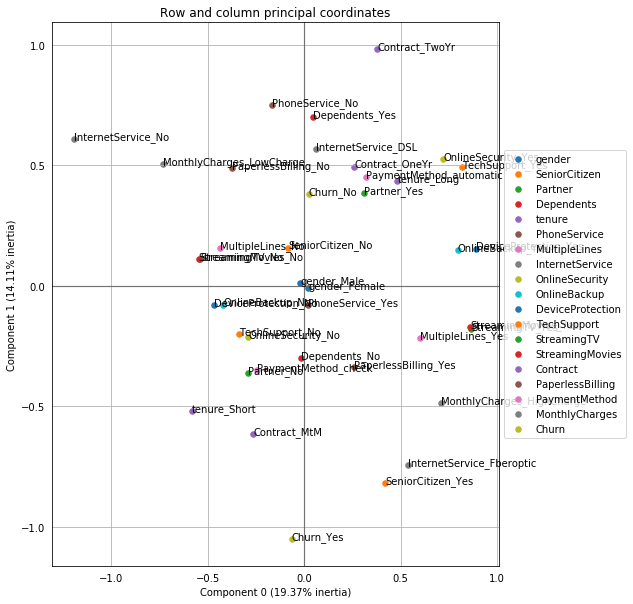

In [14]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_mca = mca.fit(churn1)

ax = churn_mca.plot_coordinates(
        X=churn1,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))